<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pytorch-Introduction" data-toc-modified-id="Pytorch-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pytorch Introduction</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Linear-Regression-Version-2" data-toc-modified-id="Linear-Regression-Version-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear Regression Version 2</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Recurrent-Neural-Network-(RNN)" data-toc-modified-id="Recurrent-Neural-Network-(RNN)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Recurrent Neural Network (RNN)</a></span><ul class="toc-item"><li><span><a href="#Vanilla-RNN" data-toc-modified-id="Vanilla-RNN-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Vanilla RNN</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>LSTM</a></span></li></ul></li></ul></li><li><span><a href="#Reference" data-toc-modified-id="Reference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir(os.path.join('..', '..', 'notebook_format'))

from formats import load_style
load_style(css_style='custom2.css', plot_style=False)

In [2]:
os.chdir(path)

# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

%watermark -a 'Ethen' -d -t -v -p torch,numpy,matplotlib

Ethen 2020-09-26 21:24:32 

CPython 3.6.4
IPython 7.15.0

torch 1.6.0
numpy 1.18.5
matplotlib 3.1.0


# Pytorch Introduction

```bash
# installation on a mac
# for more information on installation refer to
# the following link:
# http://pytorch.org/
conda install pytorch torchvision -c pytorch 
```

At its core, PyTorch provides two main features:

- An n-dimensional Tensor, similar to numpy array but can run on GPUs. PyTorch provides many functions for operating on these Tensors, thus it can be used as a general purpose scientific computing tool.
- Automatic differentiation for building and training neural networks.

Let's dive in by looking at some examples:

## Linear Regression

In [3]:
# make up some trainig data and specify the type to be float, i.e. np.float32
# We DO not recommend double, i.e. np.float64, especially on the GPU. GPUs have bad
# double precision performance since they are optimized for float32
X_train = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 
                      2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1], dtype = np.float32)
X_train = X_train.reshape(-1, 1)
y_train = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 
                      1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3], dtype = np.float32)
y_train = y_train.reshape(-1, 1)

# Convert numpy array to Pytorch Tensors
X = torch.FloatTensor(X_train)
y = torch.FloatTensor(y_train)

Here we start defining the linear regression model, recall that in linear regression, we are optimizing for the squared loss.

\begin{align}
L = \frac{1}{2}(y-(Xw + b))^2
\end{align}

In [4]:
# with linear regression, we apply a linear transformation
# to the incoming data, i.e. y = Xw + b, here we only have a 1
# dimensional data, thus the feature size will be 1
model = nn.Linear(in_features=1, out_features=1)

# although we can write our own loss function, the nn module
# also contains definitions of popular loss functions; here
# we use the MSELoss, a.k.a the L2 loss, and size_average parameter
# simply divides it with the number of examples
criterion = nn.MSELoss(size_average=True)

# Then we use the optim module to define an Optimizer that will update the weights of
# the model for us. Here we will use SGD; but it contains many other
# optimization algorithms. The first argument to the SGD constructor tells the
# optimizer the parameters that it should update
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
# start the optimization process
n_epochs = 100
for _ in range(n_epochs):
    # torch accumulates the gradients, thus before running new things
    # use the optimizer object to zero all of the gradients for the
    # variables it will update (which are the learnable weights of the model),
    # think in terms of refreshing the gradients before doing the another round of update
    optimizer.zero_grad()

    # forward pass: compute predicted y by passing X to the model
    output = model(X)

    # compute the loss function
    loss = criterion(output, y)

    # backward pass: compute gradient of the loss with respect to model parameters
    loss.backward()

    # call the step function on an Optimizer makes an update to its parameters
    optimizer.step()

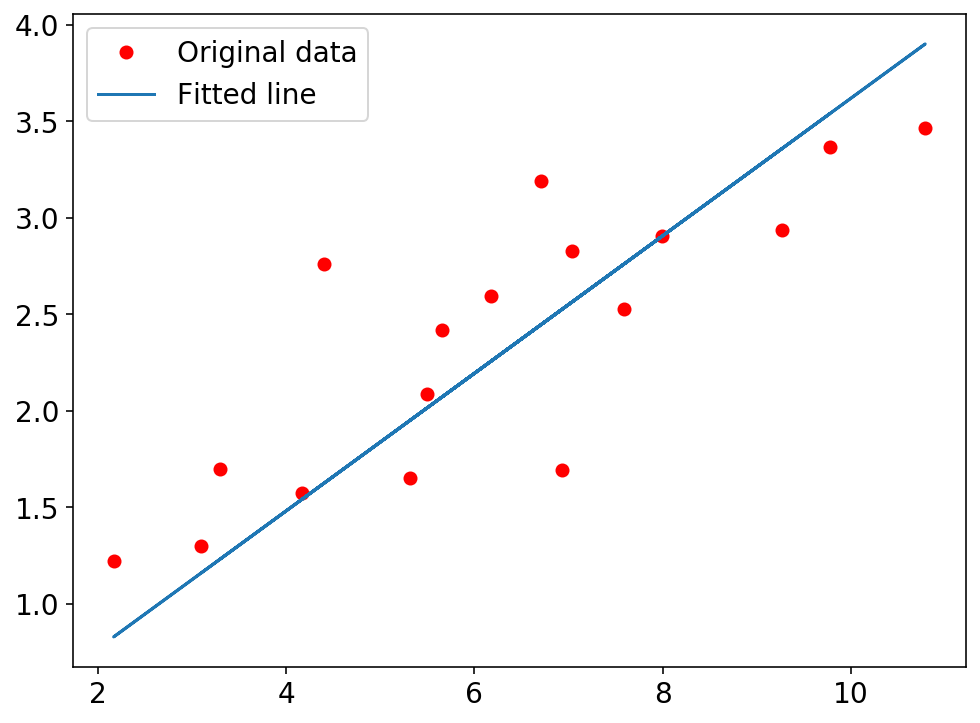

In [6]:
# plot the data and the fitted line to confirm the result

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 14

# convert a torch FloatTensor back to a numpy ndarray
# here, we also call .detach to detach the result from the computation history,
# to prevent future computations on it from being tracked
y_pred = model(X).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Original data')
plt.plot(X_train, y_pred, label='Fitted line')
plt.legend()
plt.show()

In [7]:
# to get the parameters, i.e. weight and bias from the model,
# we can use the state_dict() attribute from the model that
# we've defined
model.state_dict()

OrderedDict([('weight', tensor([[0.3563]])), ('bias', tensor([0.0564]))])

In [8]:
# or we could get it from the model's parameter
# which by itself is a generator
list(model.parameters())

[Parameter containing:
 tensor([[0.3563]], requires_grad=True),
 Parameter containing:
 tensor([0.0564], requires_grad=True)]

## Linear Regression Version 2

A better way of defining our model is to inherit the `nn.Module` class, to use it all we need to do is define our model's forward pass and the `nn.Module` will automatically define the backward method for us, where the gradients will be computed using autograd.

In [9]:
class LinearRegression(nn.Module):

    def __init__(self, in_features, out_features):
        super().__init__()  # boilerplate call
        self.in_features = in_features
        self.out_features = out_features
        self.linear = nn.Linear(in_features, out_features)  

    def forward(self, x):
        out = self.linear(x)
        return out


# same optimization process
n_epochs = 100
learning_rate = 0.01
criterion = nn.MSELoss(size_average=True)
model = LinearRegression(in_features=1, out_features=1)

# when we defined our LinearRegression class, we've assigned
# a neural network's component/layer to a class variable in the
# __init__ function, and now notice that we can directly call
# .parameters() on the class we've defined due to some Python magic
# from the Pytorch devs
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_epochs):
    # forward + backward + optimize
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    # print the loss per 20 epoch this time
    if (epoch + 1) % 20 == 0:
        # starting from pytorch 0.4.0, we use .item to get a python number from a
        # torch scalar, before loss.item() looks something like loss.data[0]
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, n_epochs, loss.item()))

Epoch [20/100], Loss: 0.1608
Epoch [40/100], Loss: 0.1602
Epoch [60/100], Loss: 0.1596
Epoch [80/100], Loss: 0.1591
Epoch [100/100], Loss: 0.1586


After training our model, we can also [save the model's parameter and load it back into the model in the future](https://stackoverflow.com/questions/42703500/best-way-to-save-a-trained-model-in-pytorch)

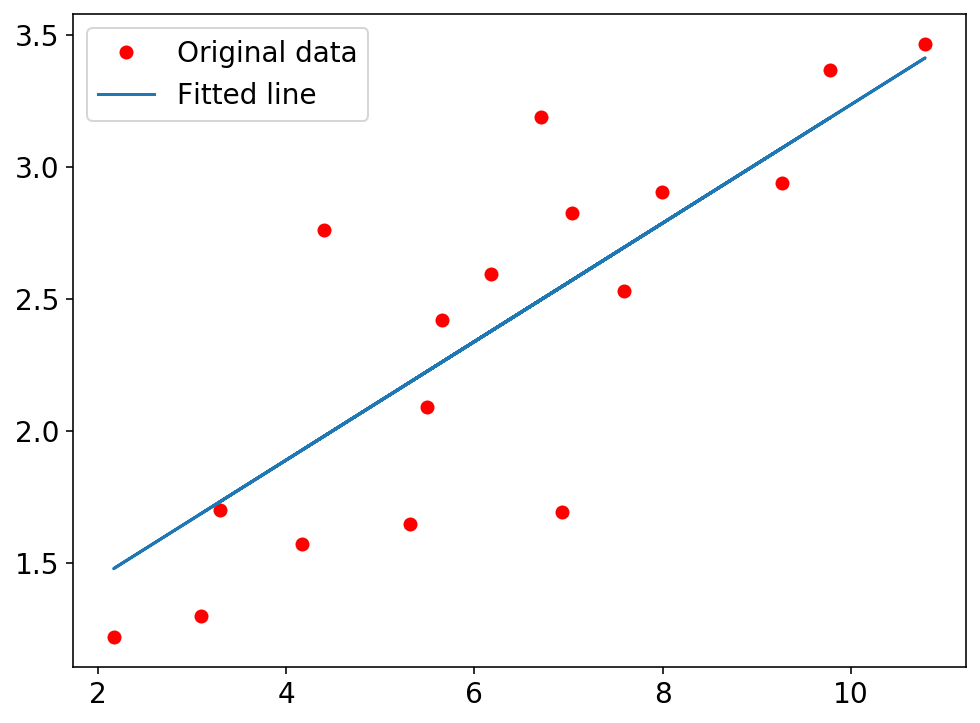

In [10]:
checkpoint_path = 'model.pkl'
torch.save(model.state_dict(), checkpoint_path)
model.load_state_dict(torch.load(checkpoint_path))

y_pred = model(X).detach().numpy()
plt.plot(X_train, y_train, 'ro', label='Original data')
plt.plot(X_train, y_pred, label='Fitted line')
plt.legend()
plt.show()

## Logistic Regression

Let's now look at a classification example, here we'll define a logistic regression that takes in a bag of words representation of some text and predicts over two labels "English" and "Spanish".

In [11]:
# define some toy dataset
train_data = [
    ('me gusta comer en la cafeteria'.split(), 'SPANISH'),
    ('Give it to me'.split(), 'ENGLISH'),
    ('No creo que sea una buena idea'.split(), 'SPANISH'),
    ('No it is not a good idea to get lost at sea'.split(), 'ENGLISH')
]

test_data = [
    ('Yo creo que si'.split(), 'SPANISH'),
    ('it is lost on me'.split(), 'ENGLISH')
]

The next code chunk create words to index mappings. To build our bag of words (BoW) representation, we need to assign each word in our vocabulary an unique index. Let's say our entire corpus only consists of two words "hello" and "world", with "hello" corresponding to index 0 and "world" to index 1. Then the BoW vector for the sentence "hello world hello world" will be [2, 2], i.e. the count for the word "hello" will be at position 0 of the array and so on.

In [12]:
idx_to_label = ['SPANISH', 'ENGLISH']
label_to_idx = {"SPANISH": 0, "ENGLISH": 1}

word_to_idx = {}
for sent, _ in train_data + test_data:
    for word in sent:
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)
print(word_to_idx)

VOCAB_SIZE = len(word_to_idx)
NUM_LABELS = len(label_to_idx)

{'me': 0, 'gusta': 1, 'comer': 2, 'en': 3, 'la': 4, 'cafeteria': 5, 'Give': 6, 'it': 7, 'to': 8, 'No': 9, 'creo': 10, 'que': 11, 'sea': 12, 'una': 13, 'buena': 14, 'idea': 15, 'is': 16, 'not': 17, 'a': 18, 'good': 19, 'get': 20, 'lost': 21, 'at': 22, 'Yo': 23, 'si': 24, 'on': 25}


Next we define our model using the inherenting from `nn.Module` approach and also two helper functions to convert our data to torch Tensors so we can use to during training.

In [13]:
class BoWClassifier(nn.Module):

    def __init__(self, vocab_size, num_labels):
        super().__init__()
        self.linear = nn.Linear(vocab_size, num_labels)

    def forward(self, bow_vector):
        """
        When we're performing a classification, after passing
        through the linear layer or also known as the affine layer
        we also need pass it through the softmax layer to convert a vector
        of real numbers into probability distribution, here we use
        log softmax for numerical stability reasons.
        """
        return F.log_softmax(self.linear(bow_vector), dim = 1)

In [14]:
def make_bow_vector(sentence, word_to_idx):
    vector = torch.zeros(len(word_to_idx))
    for word in sentence:
        vector[word_to_idx[word]] += 1

    return vector.view(1, -1)


def make_target(label, label_to_idx):
    return torch.LongTensor([label_to_idx[label]])

We are now ready to train this!

In [15]:
model = BoWClassifier(VOCAB_SIZE, NUM_LABELS)

# note that instead of using NLLLoss (negative log likelihood),
# we could have used CrossEntropyLoss and remove the log_softmax
# function call in our forward method. The CrossEntropyLoss docstring
# explciitly states that this criterion combines `LogSoftMax` and
# `NLLLoss` in one single class.
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

n_epochs = 100
for epoch in range(n_epochs):
    for instance, label in train_data:
        bow_vector = make_bow_vector(instance, word_to_idx)
        target = make_target(label, label_to_idx)

        # standard step to perform the forward and backward step
        model.zero_grad()
        log_probs = model(bow_vector)
        loss = criterion(log_probs, target)
        loss.backward()
        optimizer.step()

# we can also wrap the code block in with torch.no_grad(): to
# prevent history tracking, this is often used in model inferencing,
# or when evaluating the model as we won't be needing the gradient during
# this stage

with torch.no_grad():
    # predict on the test data to check if the model actually learned anything
    for instance, label in test_data:
        bow_vec = make_bow_vector(instance, word_to_idx)
        log_probs = model(bow_vec)

        y_pred = np.argmax(log_probs[0].numpy())
        label_pred = idx_to_label[y_pred]
        print('true label: ', label, ' predicted label: ', label_pred)

true label:  SPANISH  predicted label:  SPANISH
true label:  ENGLISH  predicted label:  ENGLISH


## Recurrent Neural Network (RNN)

The idea behind RNN is to make use of sequential information that exists in our dataset. In feedforward neural network, we assume that all inputs and outputs are independent of each other. But for some tasks, this might not be the best way to tackle the problem. For example, in Natural Language Processing (NLP) applications, if we wish to predict the next word in a sentence (one business application of this is [Swiftkey](https://en.wikipedia.org/wiki/SwiftKey)), then we could imagine that knowing the word that comes before it can come in handy.

### Vanilla RNN

The input $x$ will be a sequence of words, and each $x_t$ is a single word. And because of how matrix multiplication works, we can't simply use a word index like (36) as an input, instead we represent each word as a one-hot vector with a size of the total number of vocabulary. For example, the word with index 36 have the value 1 at position 36 and the rest of the value in the vector would all be 0's.

In [16]:
torch.manual_seed(777)

# suppose we have a
# one hot encoding for each char in 'hello'
# and the sequence length for the word 'hello' is 5
seq_len = 5
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

# here we specify a single RNN cell with the property of
# input_dim (4) -> output_dim (2)
# batch_first explained in the following
rnn_cell = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

# our input shape should be of shape
# (batch, seq_len, input_size) when batch_first=True;
# the input size basically refers to the number of features
# (seq_len, batch_size, input_size) when batch_first=False (default)
# thus we reshape our input to the appropriate size, torch.view is
# equivalent to numpy.reshape
inputs = torch.Tensor([h, e, l, l, o])
inputs = inputs.view(1, 5, -1)

# our hidden is the weights that gets passed along the cells,
# here we initialize some random values for it:
# (batch, num_layers * num_directions, hidden_size) for batch_first=True
# disregard the second argument as of now
hidden = torch.zeros(1, 1, 2)
out, hidden = rnn_cell(inputs, hidden)
print('sequence input size', inputs.size())
print('out size', out.size())
print('sequence size', hidden.size())

# the first value returned by the rnn cell is all
# of the hidden state throughout the sequence, while
# the second value is the most recent hidden state;
# hence we can compare the last slice of the the first
# value with the second value to confirm that they are
# the same
print('\ncomparing rnn cell output:')
print(out[:, -1, :])
hidden[0]

sequence input size torch.Size([1, 5, 4])
out size torch.Size([1, 5, 2])
sequence size torch.Size([1, 1, 2])

comparing rnn cell output:
tensor([[-0.7762,  0.8319]], grad_fn=<SliceBackward>)


tensor([[-0.7762,  0.8319]], grad_fn=<SelectBackward>)

In the next section, we'll teach our RNN to produce "ihello" from "hihell".

In [17]:
# create an index to character mapping
idx2char = ['h', 'i', 'e', 'l', 'o']

# Teach hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]    # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3

x_one_hot = np.array(x_one_hot)
y_data = np.array([1, 0, 2, 3, 3, 4])  # ihello

# As we have one batch of samples, we will change them to variables only once
inputs = torch.Tensor(x_one_hot)
labels = torch.LongTensor(y_data)

# hyperparameters
seq_len = 6      # |hihell| == 6, equivalent to time step
input_size = 5   # one-hot size
batch_size = 1   # one sentence per batch
num_layers = 1   # one-layer rnn
num_classes = 5  # predicting 5 distinct character
hidden_size = 4  # output from the RNN

In [18]:
class RNN(nn.Module):
    """
    The RNN model will be a RNN followed by a linear layer,
    i.e. a fully-connected layer
    """
    def __init__(self, seq_len, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.seq_len = seq_len
        self.num_layers = num_layers
        self.input_size = input_size
        self.num_classes = num_classes
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # assuming batch_first = True for RNN cells
        batch_size = x.size(0)
        hidden = self._init_hidden(batch_size)
        x = x.view(batch_size, self.seq_len, self.input_size)

        # apart from the output, rnn also gives us the hidden
        # cell, this gives us the opportunity to pass it to
        # the next cell if needed; we won't be needing it here
        # because the nn.RNN already computed all the time steps
        # for us. rnn_out will of size [batch_size, seq_len, hidden_size]
        rnn_out, _ = self.rnn(x, hidden)
        linear_out = self.linear(rnn_out.view(-1, hidden_size))
        return linear_out

    def _init_hidden(self, batch_size):
        """
        Initialize hidden cell states, assuming
        batch_first = True for RNN cells
        """
        return torch.zeros(batch_size, self.num_layers, self.hidden_size)

In [19]:
# Set loss, optimizer and the RNN model
torch.manual_seed(777)
rnn = RNN(seq_len, num_classes, input_size, hidden_size, num_layers)
print('network architecture:\n', rnn)

# train the model
num_epochs = 15
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.1)
for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()
    outputs = rnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # check the current predicted string
    # max gives the maximum value and its
    # corresponding index, we will only
    # be needing the index
    _, idx = outputs.max(dim = 1)
    idx = idx.detach().numpy()
    result_str = [idx2char[c] for c in idx]
    print('epoch: {}, loss: {:1.3f}'.format(epoch, loss.item()))
    print('Predicted string: ', ''.join(result_str))

network architecture:
 RNN(
  (rnn): RNN(5, 4, batch_first=True)
  (linear): Linear(in_features=4, out_features=5, bias=True)
)
epoch: 1, loss: 1.756
Predicted string:  eeeeee
epoch: 2, loss: 1.626
Predicted string:  ehhhhh
epoch: 3, loss: 1.485
Predicted string:  elllll
epoch: 4, loss: 1.405
Predicted string:  llllll
epoch: 5, loss: 1.293
Predicted string:  illlll
epoch: 6, loss: 1.217
Predicted string:  iiilll
epoch: 7, loss: 1.057
Predicted string:  iollll
epoch: 8, loss: 0.967
Predicted string:  ielllo
epoch: 9, loss: 0.837
Predicted string:  ihlllo
epoch: 10, loss: 0.696
Predicted string:  ihello
epoch: 11, loss: 0.615
Predicted string:  ihello
epoch: 12, loss: 0.535
Predicted string:  ihhllo
epoch: 13, loss: 0.452
Predicted string:  ihhllo
epoch: 14, loss: 0.387
Predicted string:  ihello
epoch: 15, loss: 0.322
Predicted string:  ihello


### LSTM

The example below uses an LSTM to generate part of speech tags. The usage of LSTM API is essentially the same as the RNN we were using in the last section. Expect in this example, we will prepare the word to index mapping ourselves and as for the modeling part, we will add an embedding layer before the LSTM layer, this is a common technique in NLP applications. So for each word, instead of using the one hot encoding way of representation the data (which can be inefficient and it treats all words as independent entities with no relationships amongst each other), word embeddings will compress them into a lower dimension that encode the semantics of the words, i.e. how similar each word is used within our given corpus.

In [20]:
# These will usually be more like 32 or 64 dimensional.
# We will keep them small for this toy example
EMBEDDING_SIZE = 6
HIDDEN_SIZE = 6

training_data = [
    ("The dog ate the apple".split(), ["DET", "NN", "V", "DET", "NN"]),
    ("Everybody read that book".split(), ["NN", "V", "DET", "NN"])
]

idx_to_tag = ['DET', 'NN', 'V']
tag_to_idx = {'DET': 0, 'NN': 1, 'V': 2}

word_to_idx = {}
for sent, tags in training_data:
    for word in sent:
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)

word_to_idx

{'The': 0,
 'dog': 1,
 'ate': 2,
 'the': 3,
 'apple': 4,
 'Everybody': 5,
 'read': 6,
 'that': 7,
 'book': 8}

In [21]:
def prepare_sequence(seq, to_idx):
    """Convert sentence/sequence to torch Tensors"""
    idxs = [to_idx[w] for w in seq]
    return torch.LongTensor(idxs)

seq = training_data[0][0]
inputs = prepare_sequence(seq, word_to_idx)
inputs

tensor([0, 1, 2, 3, 4])

In [22]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_size, hidden_size, vocab_size, tagset_size):
        super().__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.tagset_size = tagset_size

        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size)
        self.hidden2tag = nn.Linear(hidden_size, tagset_size)

    def forward(self, x):
        embed = self.embedding(x)
        hidden = self._init_hidden()

        # the second dimension refers to the batch size, which we've hard-coded
        # it as 1 throughout the example
        lstm_out, lstm_hidden = self.lstm(embed.view(len(x), 1, -1), hidden)
        output = self.hidden2tag(lstm_out.view(len(x), -1))
        return output

    def _init_hidden(self):
        # the dimension semantics are [num_layers, batch_size, hidden_size]
        return (torch.rand(1, 1, self.hidden_size),
                torch.rand(1, 1, self.hidden_size))

In [23]:
model = LSTMTagger(EMBEDDING_SIZE, HIDDEN_SIZE, len(word_to_idx), len(tag_to_idx))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 300
for epoch in range(epochs):
    for sentence, tags in training_data:
        model.zero_grad()

        sentence = prepare_sequence(sentence, word_to_idx)
        target = prepare_sequence(tags, tag_to_idx)

        output = model(sentence)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [24]:
inputs = prepare_sequence(training_data[0][0], word_to_idx)
tag_scores = model(inputs)

# validating that the sentence "the dog ate the apple".
# the correct tag should be DET NOUN VERB DET NOUN
print('expected target: ', training_data[0][1])

tag_scores = tag_scores.detach().numpy()
tag = [idx_to_tag[idx] for idx in np.argmax(tag_scores, axis = 1)]
print('generated target: ', tag)

expected target:  ['DET', 'NN', 'V', 'DET', 'NN']
generated target:  ['DET', 'NN', 'V', 'DET', 'NN']


# Reference

- [Github: Simple PyTorch Tutorials Zero to ALL!](https://github.com/hunkim/PyTorchZeroToAll)
- [Github: PyTorch Tutorial for Deep Learning Researchers](https://github.com/yunjey/pytorch-tutorial)
- [PyTorch Documentation: Deep Learning for NLP with Pytorch](http://pytorch.org/tutorials/beginner/deep_learning_nlp_tutorial.html)
- [PyTorch Documentation: Deep Learning with PyTorch: A 60 Minute Blitz](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)